   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
setosa        50
versicolor    50
virginica     50
dtype: int64


C:\Users\Drizzle\AppData\Local\Temp\ipykernel_11756\3999188883.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


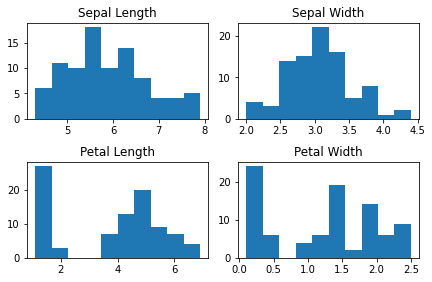

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data=pd.read_csv('data.csv')
print(data.head(5))
print(data.describe())
print(data.groupby('species').size())

#Holdout split
train, test = train_test_split (data, test_size=0.4, stratify=data['species'], random_state=42)

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(train ['sepal_length'], bins=n_bins)
axs[0, 0].set_title('Sepal Length')
axs[0, 1].hist(train['sepal_width'], bins=n_bins)
axs[0, 1].set_title('Sepal Width')
axs[1, 0].hist(train['petal_length'], bins=n_bins)
axs[1, 0].set_title('Petal Length')
axs[1, 1].hist(train['petal_width'], bins=n_bins)
axs[1, 1].set_title('Petal Width')

# add some spacing between subplots
fig.tight_layout(pad=1.0)
fig.show()

X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

The accuracy of the Decision Tree is 0.983


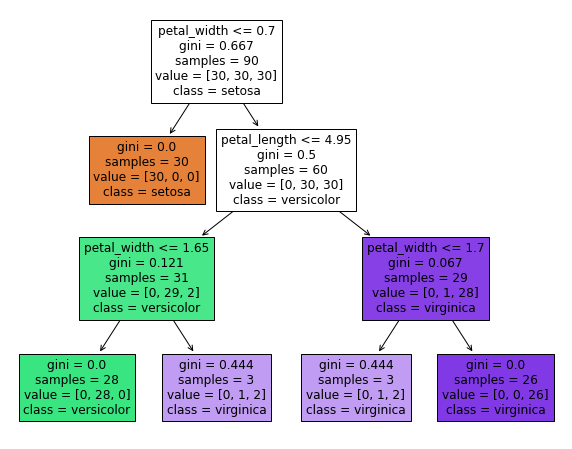

In [2]:
mod_dt = DecisionTreeClassifier(max_depth=3,random_state=1)
mod_dt.fit(X_train,y_train)
prediction = mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction, y_test)))
fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = ['setosa','versicolor','virginica']

plt.figure(figsize=(10,8))
plot_tree(mod_dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [3]:
mod_dt = KNeighborsClassifier()
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)
print('The accuracy of the KNN is', "{:.3f}".format(metrics.accuracy_score(prediction, y_test)))

The accuracy of the KNN is 0.933


In [4]:
mod_dt = SVC()
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)
print('The accuracy of the SVC is', "{:.3f}".format(metrics.accuracy_score(prediction, y_test)))

The accuracy of the SVC is 0.967


In [5]:
mod_dt = GaussianNB()
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)
print('The acccuracy of the GaussianNB is', "{:.3f}".format(metrics.accuracy_score(prediction, y_test)))

The acccuracy of the GaussianNB is 0.933
